### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## t-SNE 를 이용한 시각화

- t-SNE 는 매니폴드(manifold) 학습의 일종입니다. 매니폴드는 아래 그림에서 보듯이 고차원의 데이터가 숨겨져 있는 저차원으로 표현할 수 있을 것이라는 가정을 가지고 데이터를 변환하는 것입니다.<br>
<img src="ch03_03.jpg" />
(출처 : https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Manifold_learning_algorithms)<br><br>

- t-SNE(t-distributed stochastic neighbor embedding) 는 점들 사이의 거리를 기반으로 주로 2차원 평면 상에 점들을 뿌리는 방식입니다. 가까이 있는 점들은 가깝게 위치하려고 합니다. 그리고 가까운 점들에 가중치를 더 줘서 가까운 점들을 더 잘 보존하려고 합니다. (SVM 에서 배운 rbf 와 유사한 거리 함수를 사용합니다.)
- 숫자 이미지 데이터인 MNIST 를 가지고 테스트 하겠습니다.

In [9]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [10]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [11]:
mnist.images.shape, mnist.target.shape

((1797, 8, 8), (1797,))

In [12]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

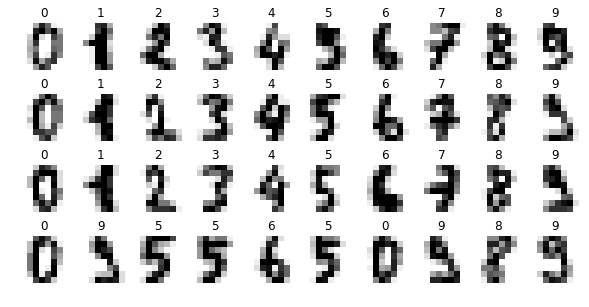

In [13]:
plt.figure(figsize=[10,5])
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r', vmin=0, vmax=15)
    plt.axis('off')
    plt.title(mnist.target[i])

In [14]:
mnist.data.shape

(1797, 64)

- t-SNE 적용

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE()

mnist_tsne = tsne.fit_transform(mnist.data)

In [16]:
mnist_tsne.shape

(1797, 2)

In [17]:
xmax, ymax = mnist_tsne.max(axis=0)
xmin, ymin = mnist_tsne.min(axis=0)

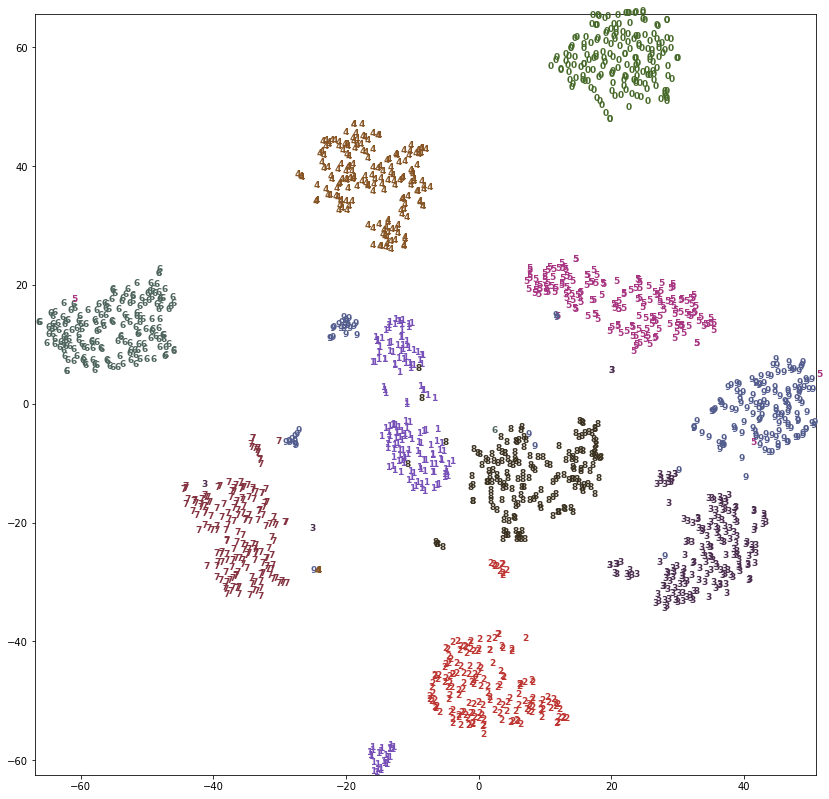

In [18]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(mnist.data.shape[0]):
    plt.text(mnist_tsne[i,0], mnist_tsne[i,1],str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})